### Phân tích cú pháp: Bài tập về nhà 


#### Mở rộng bài tập 2 của bài trên lớp:

-	Bổ sung các trường hợp bắt lỗi của Subject-Verb

-	Sửa các hàm nếu cần thiết


Bài 2: chương trình minh hoạ kiểm lỗi cú pháp tiếng Anh đơn giản 

    1)

    a) Cài đặt thư viện Stanford NLPCore  

    b) import bộ phân tích cú pháp CoreNLPParser 

    2)  Phân tích cú pháp cho câu và khảo sát  cây cú pháp

    a) gọi phân tích cú pháp

    b) view cây 

    3) Qui tắc kiểm lỗi cú pháp

    -	Ví dụ về Qui tắc agreement giữa Subject – Verb

    -	Kiểm lỗi và đưa ra loại lỗi 


In [ ]:
import os
#Setpath

#Set up môi trường cho corenlp  đường dẫn bên dưới đến thư mục "stanford-corenlp-4.2.0"
from nltk.parse.corenlp import CoreNLPServer
STANFORD = os.path.join("", "stanford-corenlp-4.2.0")
#  Giải nén và loadmodel
model = CoreNLPServer(
   os.path.join(STANFORD, "stanford-corenlp-4.2.0.jar"),
   os.path.join(STANFORD, "stanford-corenlp-4.2.0-models.jar"),    
)

In [ ]:
# Cài đặt java JDK nếu chưa có (https://www.oracle.com/java/technologies/javase-downloads.html)

#Thêm biến môi trường
import os
java_path = "C:/Program Files/Java/jdk-15.0.1/bin/java.exe" #replace directory by your directory
os.environ['JAVAHOME'] = java_path

import nltk
nltk.internals.config_java('C:/Program Files/Java/jdk-15.0.1/bin/java.exe') #replace directory by your directory

In [ ]:
#install ghostscript and add path because your chunker is trying to use ghostscript to draw a parse tree of the sentence
# https://www.ghostscript.com/download.html

#Thêm biến môi trường
import os
ghostscript_path = "C:/Program Files/gs/gs9.53.3/bin/gswin64c.exe" #replace directory by your directory
os.environ['PATH'] = ghostscript_path


In [ ]:
# Start the model CoreNLPServer
model.start()

In [ ]:
from nltk.tree import Tree
from nltk.parse.corenlp import CoreNLPParser

                        ROOT                         
                         |                            
                         S                           
         ________________|_________________________   
        |                         VP               | 
        |                 ________|___             |  
        NP               |            NP           | 
  ______|________        |     _______|______      |  
PRP$    JJ       NN     VBD   DT      JJ     NN    . 
 |      |        |       |    |       |      |     |  
 my  english instructor were  a      good teacher  . 

(ROOT
  (S
    (NP (PRP$ my) (JJ english) (NN instructor))
    (VP (VBD were) (NP (DT a) (JJ good) (NN teacher)))
    (. .)))


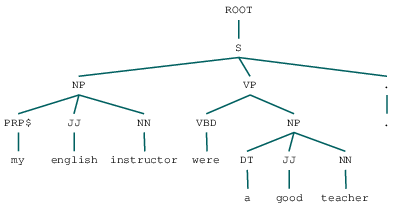

In [ ]:
def parse_processing(string):
    #Tạo parse tree
    #ENTER YOUR CODE HERE
    # tạo cây cú pháp dùng CoreNLPParser
    
    #END YOUR CODE
    
    #Định dạng kiểu cho parse tree
    tree = Tree.fromstring(str(parse), 
               read_node=lambda s: "%s" % s, # xuất node
               read_leaf=lambda s: "%s" % s.lower()) # xuất lá
    tree.pretty_print()
    return tree

string = 'My English instructor were a good teacher.'
tree = parse_processing(string)
print(tree)
tree

In [ ]:
print(tree.leaves())
for child in tree:
    print(child.label())

['my', 'english', 'instructor', 'were', 'a', 'good', 'teacher', '.']
S


In [ ]:
# phân tích dependency parsing 
from nltk.parse.corenlp import CoreNLPDependencyParser

In [ ]:
#string = 'I put the book in the box on the table.'
string = 'I have booked a very nice hotel.'

#ENTER YOUR CODE HERE
# tạo cây cú pháp dùng CoreNLPDependencyParser
#END YOUR CODE

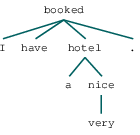

In [ ]:
parse.tree()

    ROOT        
     |           
     S          
  ___|____       
 |        VP    
 |    ____|___   
 NP  |        NP
 |   |        |  
PRP VBP      PRP
 |   |        |  
 i  love     you

2


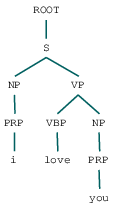

In [ ]:
#sent = 'she love a teacher very much '
#sent = 'actually her friend loves the teacher very much '
#sent = 'she loves'
#sent = 'actually she loves the teacher very much '
#sent = 'she want to teach this lecture'
sent = 'I love you'
def parse(sent):
    sent = sent.lower()
    tree = parse_processing(sent)
    return tree

tree = parse(sent)
print(len(tree[0]))
tree

In [ ]:

def getNP_VP(tree):
    NP=0
    VP=0
    for i in range(len(tree[0])):
        if tree[0][i].label()=='NP':
            NP = tree[0][i]
        if NP!=0 and tree[0][i].label()=='VP':
            VP = tree[0][i]
    return NP,VP
    

In [ ]:
NP,VP = getNP_VP(tree)
if(NP!=0): 
    NP.pretty_print()
if(VP!=0):
    VP.pretty_print()

 NP
 |  
PRP
 |  
 i 

      VP    
  ____|___   
 |        NP
 |        |  
VBP      PRP
 |        |  
love     you



In [ ]:
a = tree.subtrees()
for i in a:
    print(i.label())

ROOT
S
NP
PRP
VP
VBP
NP
PRP


In [ ]:
# xác định ngôi của chủ ngữ
'''
1:  Ngôi thứ nhất số ít: I
2:  Ngôi thứ nhất số nhiều: we
3:  Ngôi thứ 2: you 
4:  Ngôi thứ 3 số ít: he, she, it
5:   Ngôi thứ 3 số nhiều: they 
-1: không xác định (cấu trúc câu không có chủ ngữ)
'''

# xác định theo danh từ 
def get_NP_type(node):
    subnodes = node.subtrees()
    labels = [n.label() for n in subnodes]
    if 'NN' in labels:
        return 10 # singular
    elif 'NNS' in labels:
        return 11 # plural
    return -1

# xác định theo đại từ (pronoun)
def get_Pronoun_type(node):
    #ENTER YOUR CODE HERE
    # Viết hàm trả về type of pronoun theo bảng ở trên, ngoại lệ trả về -1
    #END YOUR CODE
    
print(get_Pronoun_type(NP))

1


In [ ]:
# lấy type của verb
'''
1: VB: Verb, base form
2: VBP: Verb, non-3rd person singular present
3: VBZ: Verb, 3rd person singular present
4: VBD: Verb, past tense
5: VBG: Verb, gerund or present participle
6: VBN: Verb, past participle
'''

vdict={'VB':1, 'VBP':2,'VBZ':3,'VBD':4,'VBG':5,'VBN':6}

def get_verb_type(node):
    #ENTER YOUR CODE HERE
    # Viết hàm trả về type of verb theo bảng ở trên, ngoại lệ trả về -1
    #END YOUR CODE

In [ ]:
VP.pretty_print()
get_verb_type(VP)

      VP    
  ____|___   
 |        NP
 |        |  
VBP      PRP
 |        |  
love     you



2

In [ ]:
# xác định nguyên tắc lỗi
'''
NP:4 -> VP:3
'''
# bổ sung thêm các luật matching giữa Subject và VP ở đây
match={1:[2],4:[3],10:[3],11:[2]}
def check_grammar(sent):
    #ENTER YOUR CODE HERE
    # Viết hàm check lỗi grammar theo nguyên tắc lỗi được định nghĩa  NP:4 -> VP:3
    # Trường hợp NP và VP đồng thời bằng 0 trả về "no idea"
    # Nếu k có lỗi grammar trả về 'ok', lỗi trả về 'error'
    
    #END YOUR CODE

In [ ]:
#sent = 'she want to go to school'
#sent = 'actualy I now wants to go to school'
sent = 'the nice girls loves this hotel'
tree = parse(sent)
tree.pretty_print()
print(get_Pronoun_type(tree[0]))
print(get_NP_type(tree[0]))

#ENTER YOUR CODE HERE
# Check grammar của câu trên
#END YOUR CODE

          ROOT                     
           |                        
           S                       
      _____|__________              
     |                VP           
     |            ____|____         
     NP          |         NP      
  ___|_____      |     ____|____    
 DT  JJ   NNS   VBZ   DT        NN 
 |   |     |     |    |         |   
the nice girls loves this     hotel

          ROOT                     
           |                        
           S                       
      _____|__________              
     |                VP           
     |            ____|____         
     NP          |         NP      
  ___|_____      |     ____|____    
 DT  JJ   NNS   VBZ   DT        NN 
 |   |     |     |    |         |   
the nice girls loves this     hotel

-1
10
          ROOT                     
           |                        
           S                       
      _____|__________              
     |                VP           
     |  

'error'